In [1]:
import pandas as pd

file_path1 = '/home/jovyan/work/cond-sec-just-insecur-dom.xlsx'
file_path2 = '/home/jovyan/work/cond-sec-just-insecur-quart.xlsx'
file_path3 = '/home/jovyan/work/cond-sec-just-insecur-renonce.xlsx'

df1 = pd.read_excel(file_path1, sheet_name='Données', skiprows=4) 
df2 = pd.read_excel(file_path2, sheet_name='Données', skiprows=4)
df3 = pd.read_excel(file_path3, sheet_name='Données', skiprows=4)

print(df1.head())
print(df2.head())
print(df3.head())


        Unnamed: 0  Femmes  Hommes  Femmes.1  Hommes.1  Femmes.2  Hommes.2  \
0        14-29 ans    9.93    3.89      9.36      2.49      7.83      2.46   
1        30-44 ans   11.28    4.11      8.28      3.66      9.42      3.89   
2        45-59 ans   11.40    5.74      8.72      3.89     11.23      5.23   
3        60-74 ans   11.33    5.78     10.45      5.52     10.95      4.62   
4  75 ans et plus    11.09    5.73      9.99      4.91     12.27      4.29   

   Femmes.3  Hommes.3  Femmes.4  ...  Femmes.8  Hommes.8  Femmes.9  Hommes.9  \
0      8.62      2.73     10.07  ...     10.70      3.93      9.76      3.60   
1     11.30      4.51     10.56  ...     11.33      4.77      9.40      4.16   
2     11.28      4.72     11.81  ...     10.46      3.97      9.37      4.80   
3     12.89      7.64     13.04  ...     12.17      6.27     12.37      5.92   
4     14.02      5.43     13.82  ...     13.20      6.90     11.78      4.25   

   Femmes.10  Hommes.10  Femmes.11  Hommes.11  Fem

#### Style des graphiques 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", palette="colorblind")



## Nettoyage du premier fichier : Sentiment d'insécurité au domicile

In [3]:
print("Valeurs manquantes dans le premier dataset :")
print(df1.isnull().sum())

df1.dropna(how='all', inplace=True)

df1.columns = ['Tranche d\'âge'] + ['Femmes ' + str(year) for year in range(2007, 2020)] + ['Hommes ' + str(year) for year in range(2007, 2020)]


Valeurs manquantes dans le premier dataset :
Unnamed: 0    0
Femmes        0
Hommes        0
Femmes.1      0
Hommes.1      0
Femmes.2      0
Hommes.2      0
Femmes.3      0
Hommes.3      0
Femmes.4      0
Hommes.4      0
Femmes.5      0
Hommes.5      0
Femmes.6      0
Hommes.6      0
Femmes.7      0
Hommes.7      0
Femmes.8      0
Hommes.8      0
Femmes.9      0
Hommes.9      0
Femmes.10     0
Hommes.10     0
Femmes.11     0
Hommes.11     0
Femmes.12     0
Hommes.12     0
dtype: int64


## Nettoyage du deuxième fichier : Sentiment d'insécurité dans le quartier ou le village

In [4]:
print("Valeurs manquantes dans le deuxième dataset :")
print(df2.isnull().sum())

df2.dropna(how='all', inplace=True)

df2.columns = ['Tranche d\'âge'] + ['Femmes ' + str(year) for year in range(2007, 2020)] + ['Hommes ' + str(year) for year in range(2007, 2020)]



Valeurs manquantes dans le deuxième dataset :
Unnamed: 0    0
Femmes        0
Hommes        0
Femmes.1      0
Hommes.1      0
Femmes.2      0
Hommes.2      0
Femmes.3      0
Hommes.3      0
Femmes.4      0
Hommes.4      0
Femmes.5      0
Hommes.5      0
Femmes.6      0
Hommes.6      0
Femmes.7      0
Hommes.7      0
Femmes.8      0
Hommes.8      0
Femmes.9      0
Hommes.9      0
Femmes.10     0
Hommes.10     0
Femmes.11     0
Hommes.11     0
Femmes.12     0
Hommes.12     0
dtype: int64


## Nettoyage du troisième fichier : Sentiment d'insécurité (renoncement à sortir du domicile)

In [5]:
print("Valeurs manquantes dans le troisième dataset :")
print(df3.isnull().sum())

df3.dropna(how='all', inplace=True)

df3.columns = ['Tranche d\'âge'] + ['Femmes ' + str(year) for year in range(2007, 2020)] + ['Hommes ' + str(year) for year in range(2007, 2020)]



Valeurs manquantes dans le troisième dataset :
Unnamed: 0    0
Femmes        0
Hommes        0
Femmes.1      0
Hommes.1      0
Femmes.2      0
Hommes.2      0
Femmes.3      0
Hommes.3      0
Femmes.4      0
Hommes.4      0
Femmes.5      0
Hommes.5      0
Femmes.6      0
Hommes.6      0
Femmes.7      0
Hommes.7      0
Femmes.8      0
Hommes.8      0
Femmes.9      0
Hommes.9      0
Femmes.10     0
Hommes.10     0
Femmes.11     0
Hommes.11     0
Femmes.12     0
Hommes.12     0
dtype: int64


## Analyse du premier fichier : Sentiment d'insécurité au domicile

### 1. Tendances du sentiment d'insécurité au domicile au fil des années


In [6]:
# Renommer 'Unnamed: 0' en 'Tranche d\'âge'
df1 = df1.rename(columns={'Unnamed: 0': 'Tranche d\'âge'})

annees = list(range(2007, 2020))
nouvelles_colonnes = ['Tranche d\'âge']
for annee in annees:
    nouvelles_colonnes.extend([f'Femmes {annee}', f'Hommes {annee}'])

df1.columns = nouvelles_colonnes

df_melted = df1.melt(id_vars=['Tranche d\'âge'], var_name='Année et Sexe', value_name='Pourcentage')

# Séparation de 'Année et Sexe' en deux colonnes distinctes 'Année' et 'Sexe'
df_melted['Année'] = df_melted['Année et Sexe'].str.extract('(\d{4})')
df_melted['Sexe'] = df_melted['Année et Sexe'].str.extract('([Femmes|Hommes]+)')
df_melted['Année'] = pd.to_numeric(df_melted['Année'])

print(df_melted.head())


     Tranche d'âge Année et Sexe  Pourcentage  Année    Sexe
0        14-29 ans   Femmes 2007         9.93   2007  Femmes
1        30-44 ans   Femmes 2007        11.28   2007  Femmes
2        45-59 ans   Femmes 2007        11.40   2007  Femmes
3        60-74 ans   Femmes 2007        11.33   2007  Femmes
4  75 ans et plus    Femmes 2007        11.09   2007  Femmes


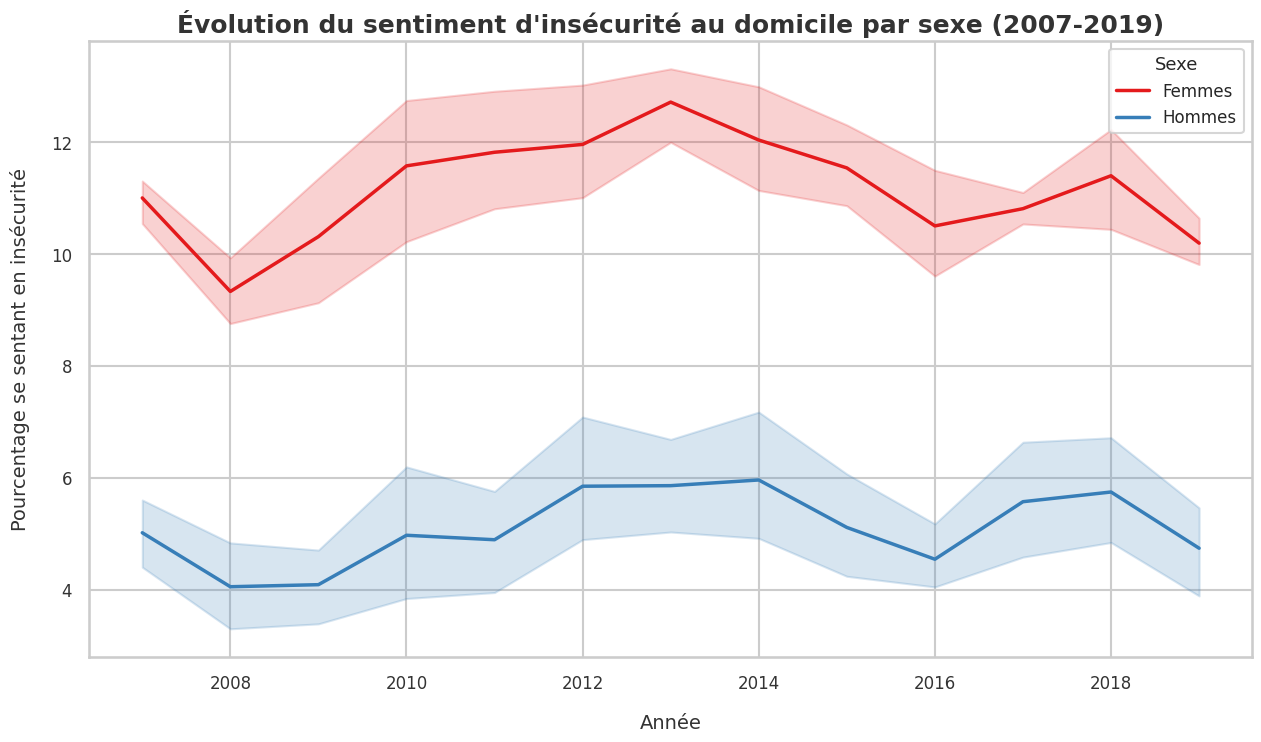

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", context="talk")


plt.figure(figsize=(15, 8))


sns.lineplot(data=df_melted, x='Année', y='Pourcentage', hue='Sexe', palette='Set1', linewidth=2.5)


plt.title('Évolution du sentiment d\'insécurité au domicile par sexe (2007-2019)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Année', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

plt.legend(title='Sexe', fontsize=12, title_fontsize='13')

plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

plt.show()


### 2. Comparaison entre les sexes

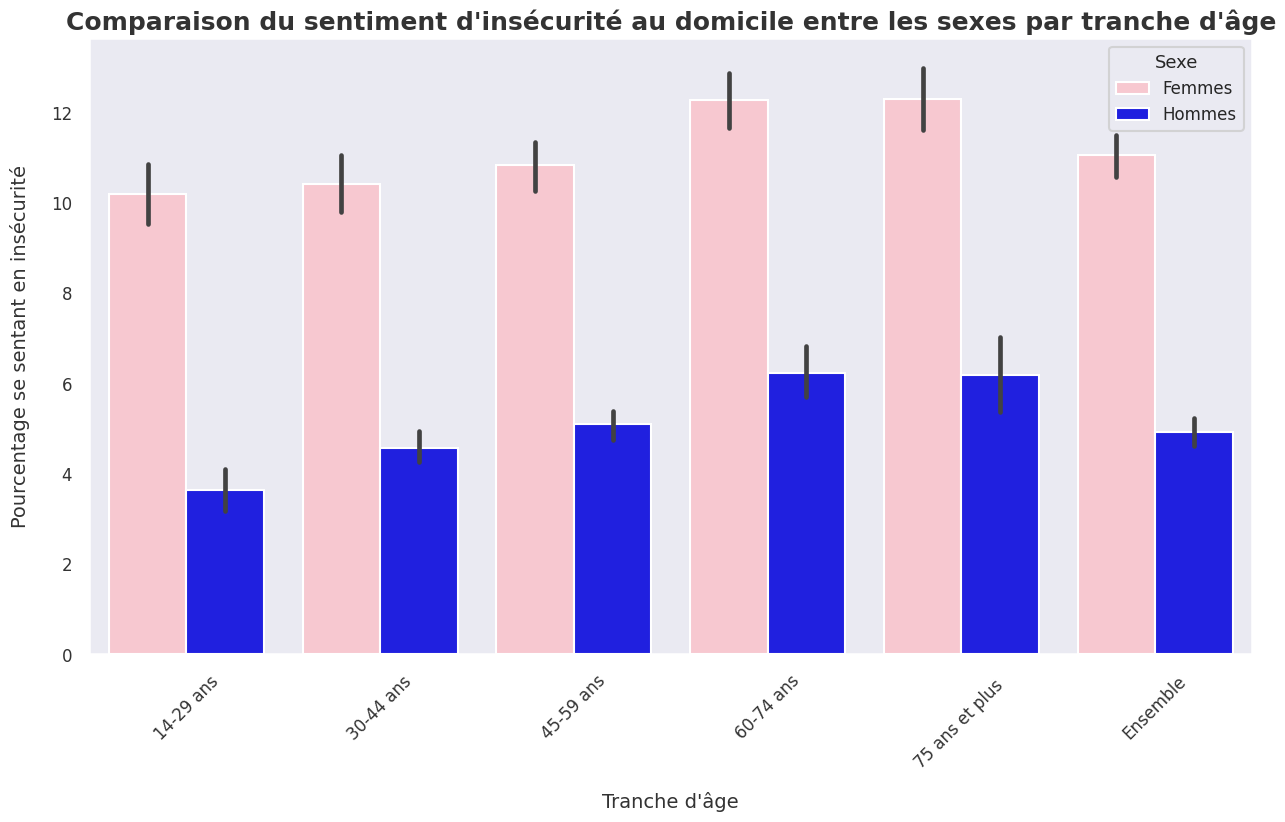

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style de Seaborn
sns.set(style="dark", context="talk")

# Définition d'une palette de couleurs personnalisée
palette_custom = {"Femmes": "pink", "Hommes": "blue"}

# Création du graphique à barres avec la palette personnalisée
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(data=df_melted, x='Tranche d\'âge', y='Pourcentage', hue='Sexe', palette=palette_custom)

# Titre et étiquettes
plt.title('Comparaison du sentiment d\'insécurité au domicile entre les sexes par tranche d\'âge', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

# Légende
plt.legend(title='Sexe', fontsize=12, title_fontsize='13', loc='upper right')

# Ajustements des étiquettes des axes
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Affichage du graphique
plt.show()


### 3. Analyse par tranche d'âge

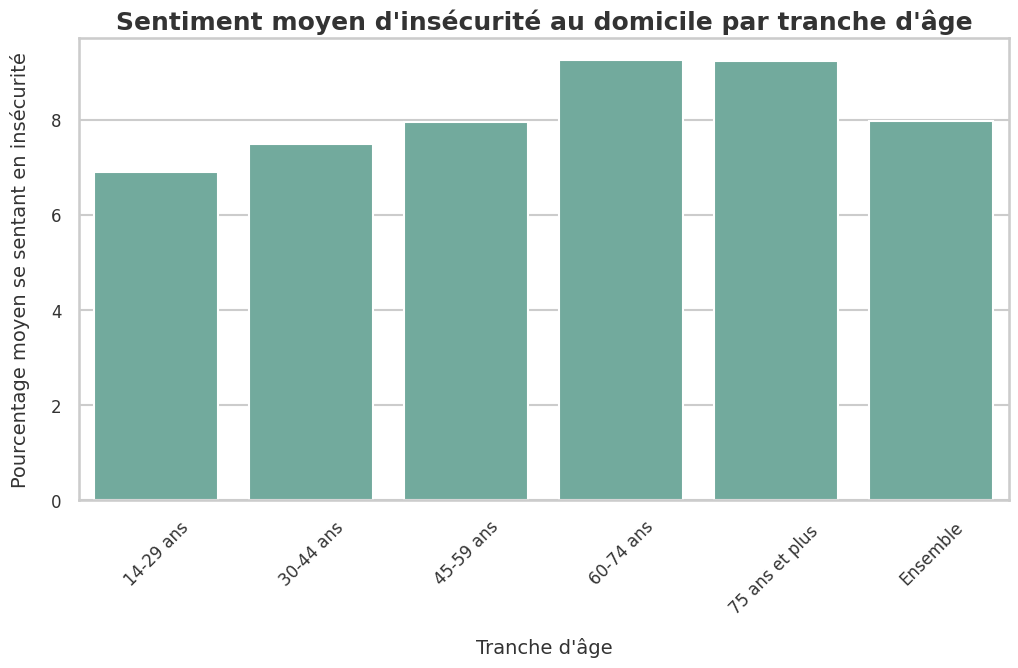

In [9]:
df_age = df_melted.groupby('Tranche d\'âge')['Pourcentage'].mean().reset_index()


sns.set(style="whitegrid", context="talk", palette="Set2")

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_age, x='Tranche d\'âge', y='Pourcentage', color='#69b3a2')

plt.title('Sentiment moyen d\'insécurité au domicile par tranche d\'âge', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage moyen se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')


plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

plt.show()


## Analyse du deuxième fichier : Sentiment d'insécurité dans le quartier ou le village

### 1. Tendances du sentiment d'insécurité dans le quartier ou le village au fil des années.

In [10]:
# Renommer 'Unnamed: 0' en 'Tranche d\'âge'
df2 = df2.rename(columns={'Unnamed: 0': 'Tranche d\'âge'})

annees = list(range(2007, 2020))
nouvelles_colonnes = ['Tranche d\'âge']
for annee in annees:
    nouvelles_colonnes.extend([f'Femmes {annee}', f'Hommes {annee}'])

df2.columns = nouvelles_colonnes

df_melted2 = df2.melt(id_vars=['Tranche d\'âge'], var_name='Année et Sexe', value_name='Pourcentage')

# Séparation de 'Année et Sexe' en deux colonnes distinctes 'Année' et 'Sexe'
df_melted2['Année'] = df_melted2['Année et Sexe'].str.extract('(\d{4})')
df_melted2['Sexe'] = df_melted2['Année et Sexe'].str.extract('([Femmes|Hommes]+)')
df_melted2['Année'] = pd.to_numeric(df_melted2['Année'])

print(df_melted2.head())


     Tranche d'âge Année et Sexe  Pourcentage  Année    Sexe
0        14-29 ans   Femmes 2007        16.04   2007  Femmes
1        30-44 ans   Femmes 2007        13.65   2007  Femmes
2        45-59 ans   Femmes 2007        13.37   2007  Femmes
3        60-74 ans   Femmes 2007        11.88   2007  Femmes
4  75 ans et plus    Femmes 2007        10.75   2007  Femmes


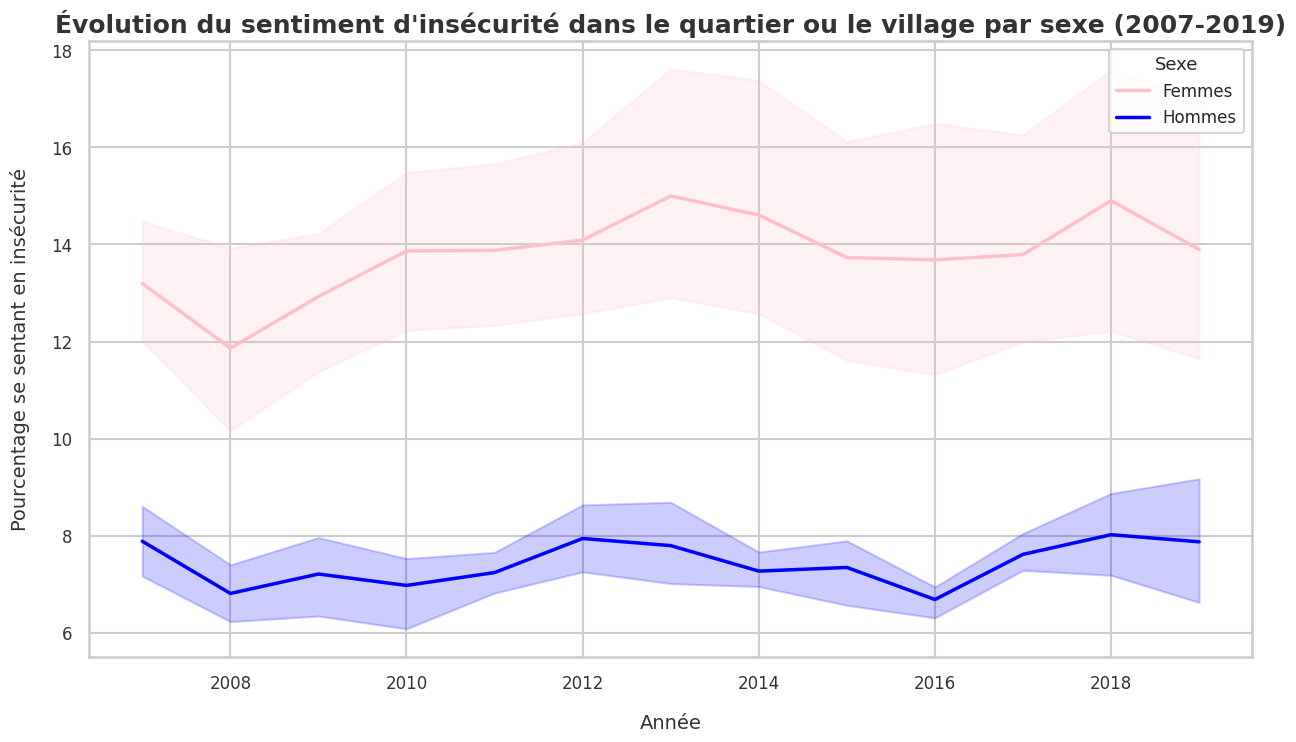

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir une palette de couleurs personnalisée
palette_couleurs = {"Femmes": "pink", "Hommes": "blue"}

# Configurer le style de Seaborn
sns.set(style="whitegrid", context="talk")

# Création du graphique en ligne
plt.figure(figsize=(15, 8))
line_plot = sns.lineplot(data=df_melted2, x='Année', y='Pourcentage', hue='Sexe', palette=palette_couleurs, linewidth=2.5)

# Améliorer la lisibilité des titres et des étiquettes
plt.title('Évolution du sentiment d\'insécurité dans le quartier ou le village par sexe (2007-2019)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Année', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

# Ajuster les paramètres des légendes
plt.legend(title='Sexe', fontsize=12, title_fontsize='13')

# Ajuster les paramètres des axes
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Afficher le graphique
plt.show()


### 2. Comparaison entre les sexes pour chaque tranche d'âge.

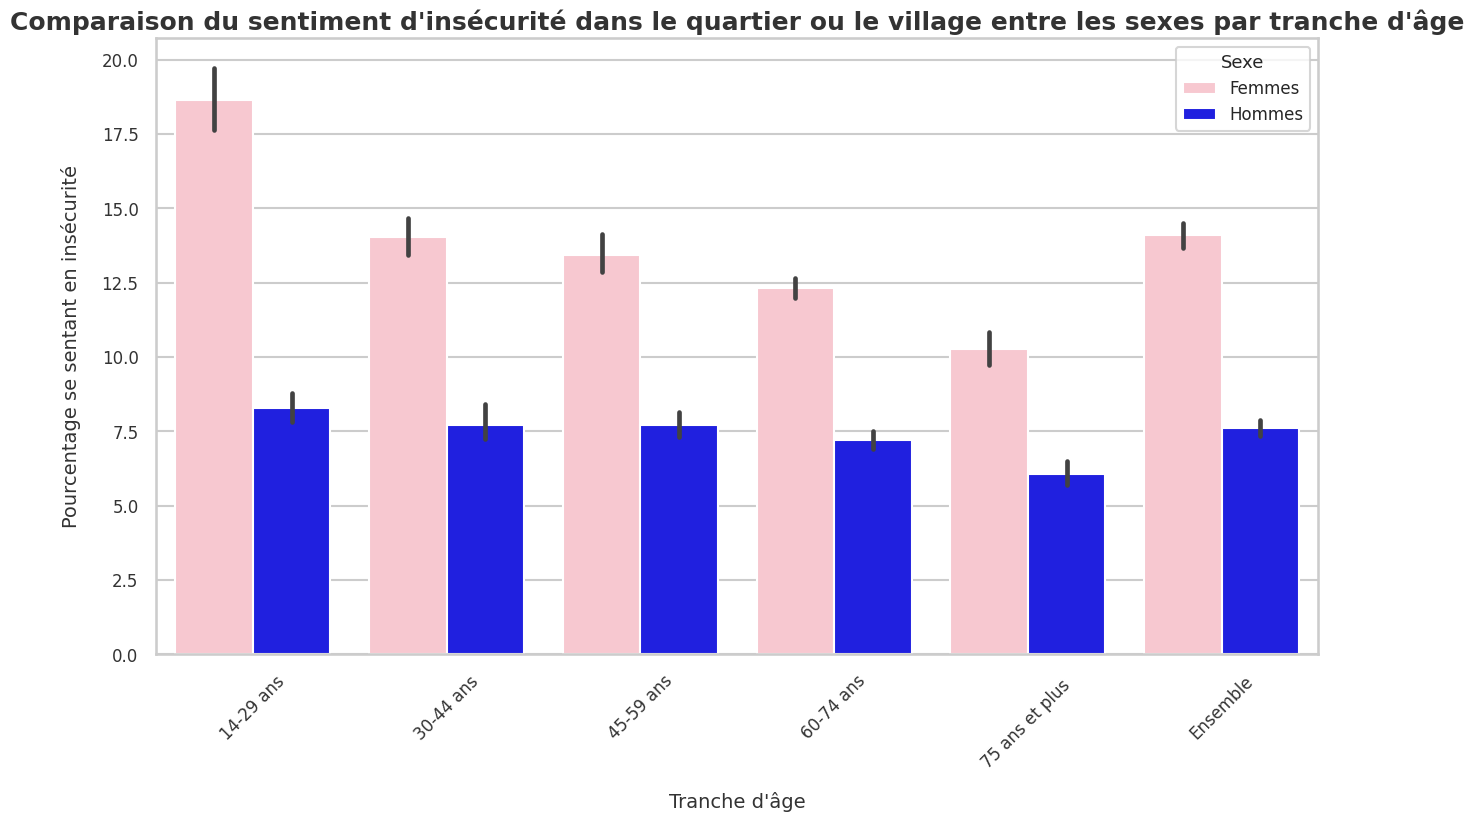

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir une palette de couleurs personnalisée
palette_couleurs = {"Femmes": "pink", "Hommes": "blue"}

# Configurer le style de Seaborn
sns.set(style="whitegrid", context="talk")

# Création du graphique en barres
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(data=df_melted2, x='Tranche d\'âge', y='Pourcentage', hue='Sexe', palette=palette_couleurs)

# Améliorer la lisibilité des titres et des étiquettes
plt.title('Comparaison du sentiment d\'insécurité dans le quartier ou le village entre les sexes par tranche d\'âge', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Ajuster les paramètres des légendes
plt.legend(title='Sexe', fontsize=12, title_fontsize='13')

# Afficher le graphique
plt.show()


### 3. Analyse par tranche d'âge.

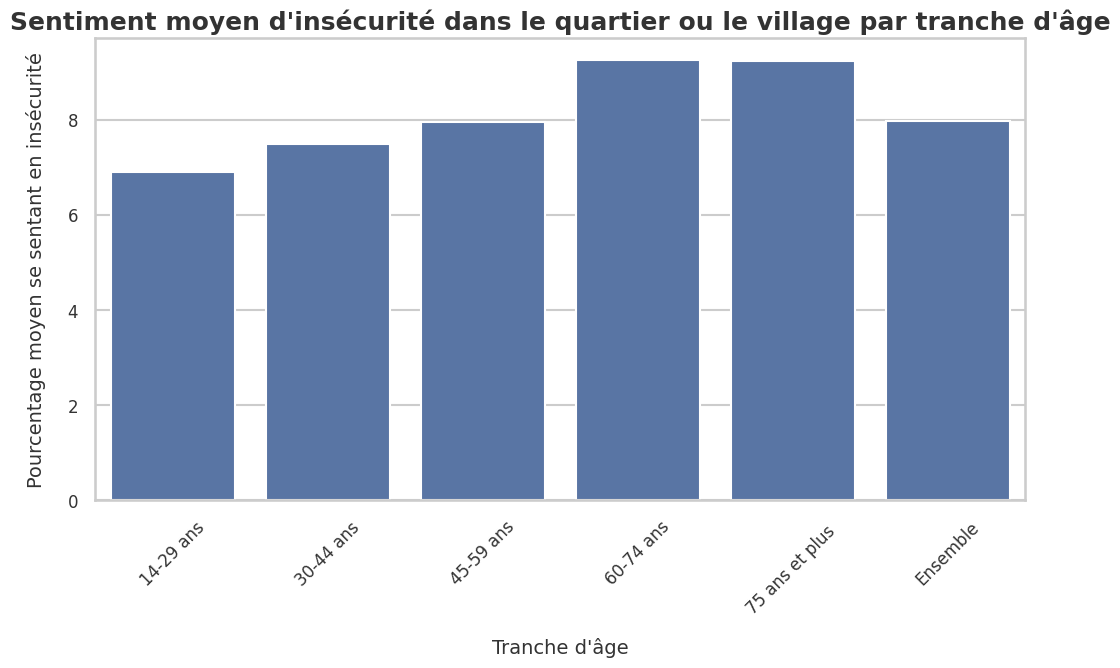

In [13]:
df_age2 = df_melted.groupby('Tranche d\'âge')['Pourcentage'].mean().reset_index()

# Configurer le style de Seaborn
sns.set(style="whitegrid", context="talk")

# Création du graphique en barres
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_age2, x='Tranche d\'âge', y='Pourcentage', color='#4c72b0')  # Choix d'une couleur bleue

# Améliorer la lisibilité des titres et des étiquettes
plt.title('Sentiment moyen d\'insécurité dans le quartier ou le village par tranche d\'âge', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage moyen se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Afficher le graphique
plt.show()


## Analyse du troisième fichier : Sentiment d'insécurité (renoncement à sortir du domicile)

##### 1. Tendances du sentiment d'insécurité lié au renoncement à sortir de son domicile au fil des années.
##### 2. Comparaison entre les sexes pour chaque tranche d'âge.
##### 3. Analyse par tranche d'âge.

### 1. Tendances du sentiment d'insécurité lié au renoncement à sortir de son domicile au fil des années

In [14]:
# Renommer 'Unnamed: 0' en 'Tranche d\'âge'
df3 = df3.rename(columns={'Unnamed: 0': 'Tranche d\'âge'})

annees = list(range(2007, 2020))
nouvelles_colonnes = ['Tranche d\'âge']
for annee in annees:
    nouvelles_colonnes.extend([f'Femmes {annee}', f'Hommes {annee}'])

df3.columns = nouvelles_colonnes

df_melted3 = df3.melt(id_vars=['Tranche d\'âge'], var_name='Année et Sexe', value_name='Pourcentage')

# Séparation de 'Année et Sexe' en deux colonnes distinctes 'Année' et 'Sexe'
df_melted3['Année'] = df_melted['Année et Sexe'].str.extract('(\d{4})')
df_melted3['Sexe'] = df_melted['Année et Sexe'].str.extract('([Femmes|Hommes]+)')
df_melted3['Année'] = pd.to_numeric(df_melted['Année'])

print(df_melted3.head())


     Tranche d'âge Année et Sexe  Pourcentage  Année    Sexe
0        14-29 ans   Femmes 2007        18.46   2007  Femmes
1        30-44 ans   Femmes 2007        16.60   2007  Femmes
2        45-59 ans   Femmes 2007        18.75   2007  Femmes
3        60-74 ans   Femmes 2007        23.56   2007  Femmes
4  75 ans et plus    Femmes 2007        24.65   2007  Femmes


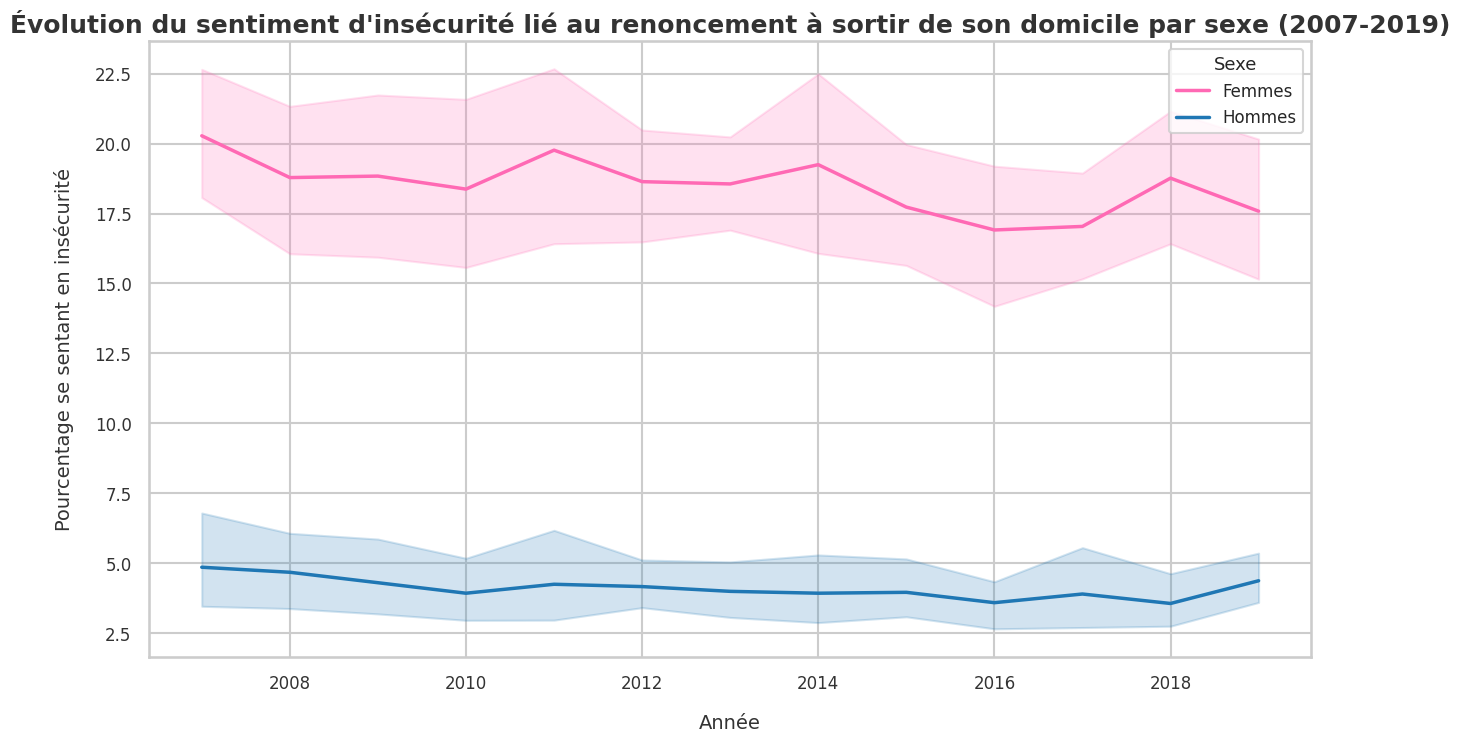

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir une palette de couleurs personnalisée
palette_couleurs = {"Femmes": "#ff69b4", "Hommes": "#1f77b4"}  # Rose pour les femmes, Bleu pour les hommes

# Configurer le style de Seaborn
sns.set(style="whitegrid", context="talk")

# Création du graphique en ligne
plt.figure(figsize=(15, 8))
line_plot = sns.lineplot(data=df_melted3, x='Année', y='Pourcentage', hue='Sexe', palette=palette_couleurs, linewidth=2.5)

# Améliorer la lisibilité des titres et des étiquettes
plt.title('Évolution du sentiment d\'insécurité lié au renoncement à sortir de son domicile par sexe (2007-2019)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Année', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

# Ajuster les paramètres des légendes
plt.legend(title='Sexe', fontsize=12, title_fontsize='13')

# Ajuster les paramètres des axes
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Afficher le graphique
plt.show()


### 2. Comparaison entre les sexes pour chaque tranche d'âge

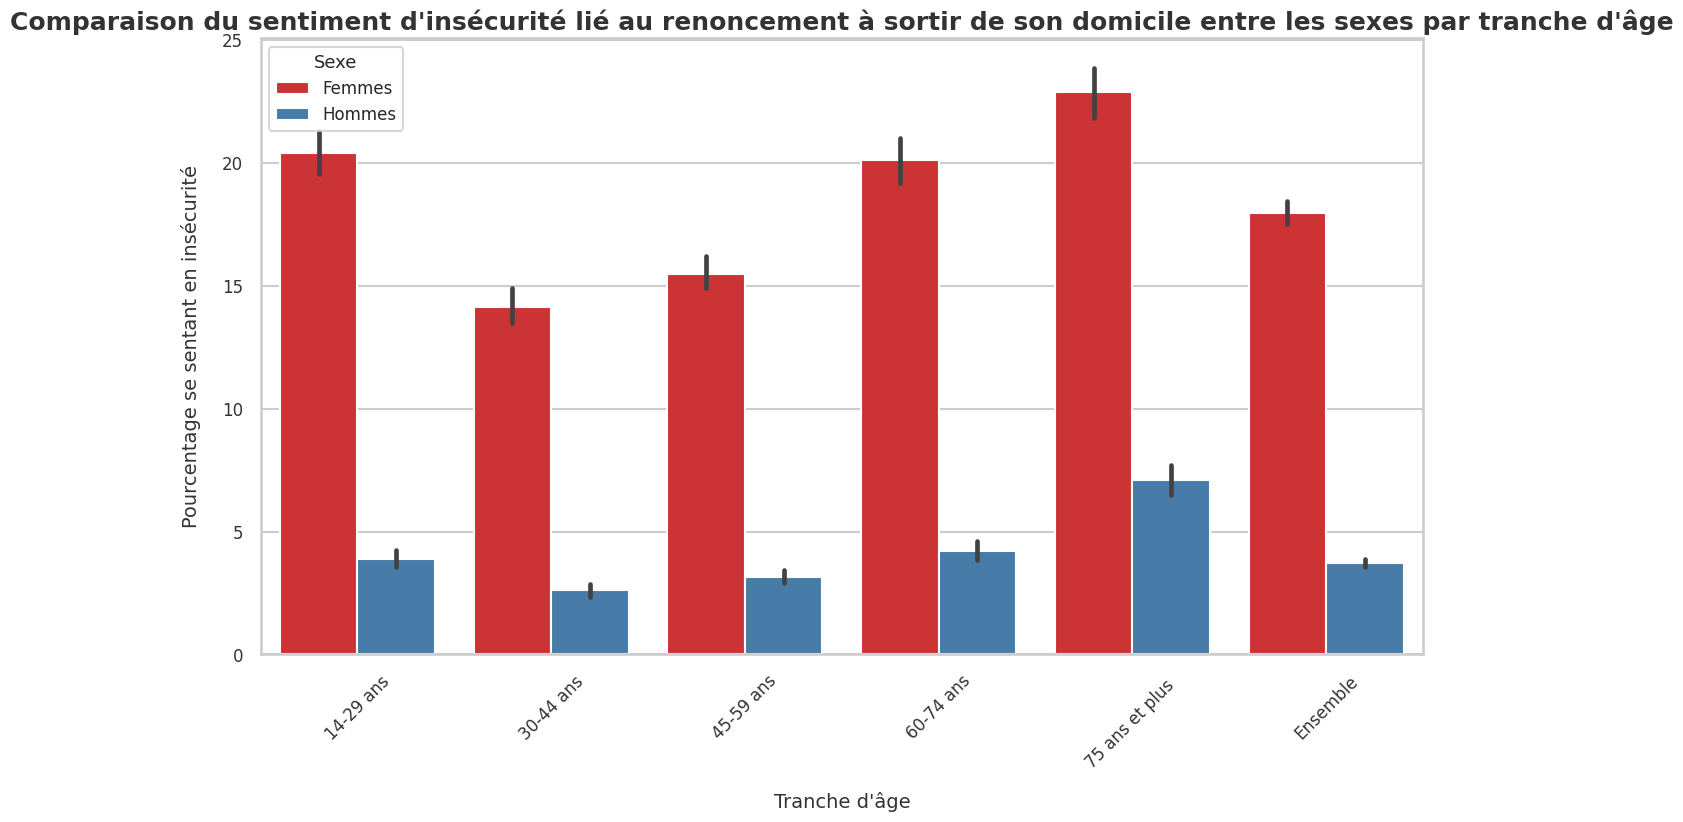

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style et le contexte
sns.set(style="whitegrid", context="talk")

# Création du graphique à barres
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(data=df_melted3, x='Tranche d\'âge', y='Pourcentage', hue='Sexe', palette='Set1')

# Personnalisation du titre et des étiquettes
plt.title('Comparaison du sentiment d\'insécurité lié au renoncement à sortir de son domicile entre les sexes par tranche d\'âge', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

# Ajustement des étiquettes des axes
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Ajout d'une légende avec un titre
plt.legend(title='Sexe', fontsize=12, title_fontsize='13', loc='upper left')

# Afficher le graphique
plt.show()


### 3. Analyse par tranche d'âge

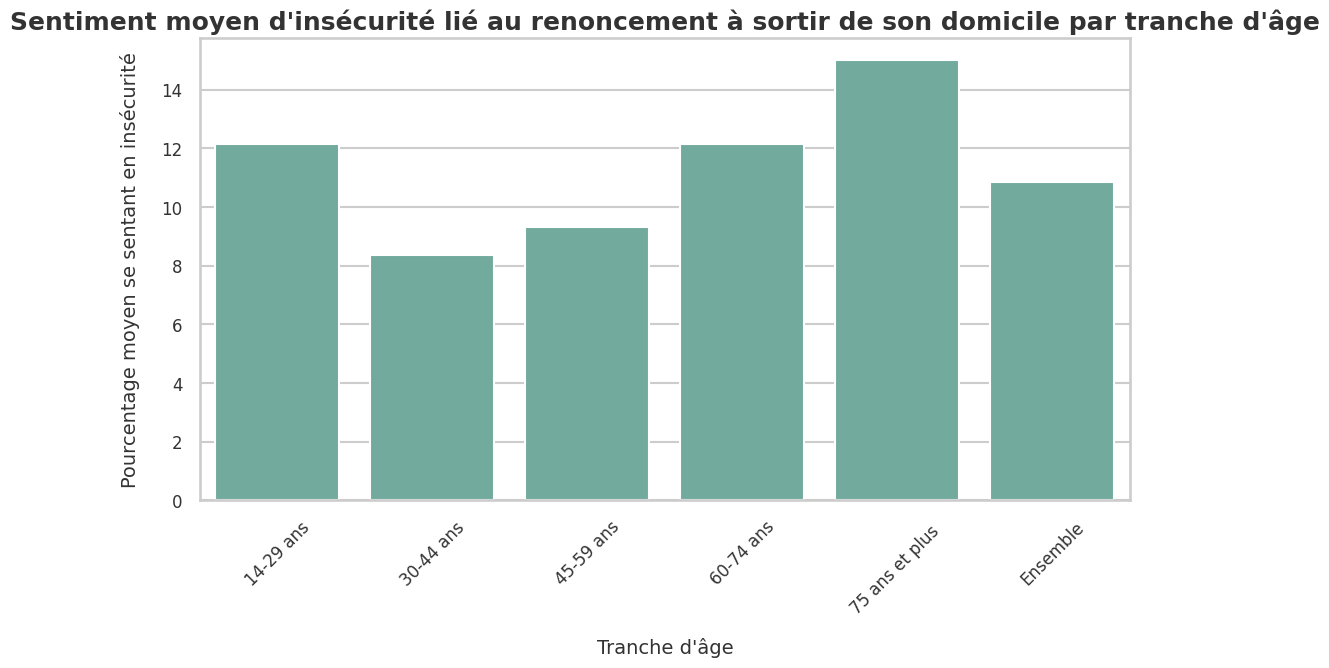

In [17]:
# Analyse par tranche d'âge
df_age3 = df_melted3.groupby('Tranche d\'âge')['Pourcentage'].mean().reset_index()

# Définir le style et le contexte
sns.set(style="whitegrid", context="talk", palette="Set2")

# Création du graphique à barres
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_age3, x='Tranche d\'âge', y='Pourcentage', color='#69b3a2')

# Personnaliser le titre, les étiquettes des axes, et les paramètres esthétiques
plt.title('Sentiment moyen d\'insécurité lié au renoncement à sortir de son domicile par tranche d\'âge', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Pourcentage moyen se sentant en insécurité', fontsize=14, labelpad=15, color='#333333')

# Ajuster les étiquettes des axes
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Afficher le graphique
plt.show()


## Partie 2 : Examiner les Tendances Générales

In [18]:
# Ajout d'une colonne contexte dans chaque DataFrame
df1['Contexte'] = 'Au domicile'
df2['Contexte'] = 'Dans le quartier/village'
df3['Contexte'] = 'Renoncement à sortir'

# Fusion des DataFrames
df_total = pd.concat([df1, df2, df3], axis=0)


In [19]:
# Restructuration de df1, df2, et df3 pour fusionner les années
df1_melted = df1.melt(id_vars=['Tranche d\'âge', 'Contexte'], var_name='Année et Sexe', value_name='Pourcentage')
df2_melted = df2.melt(id_vars=['Tranche d\'âge', 'Contexte'], var_name='Année et Sexe', value_name='Pourcentage')
df3_melted = df3.melt(id_vars=['Tranche d\'âge', 'Contexte'], var_name='Année et Sexe', value_name='Pourcentage')

# Fusion des trois DataFrames
df_total = pd.concat([df1_melted, df2_melted, df3_melted], ignore_index=True)


In [20]:
# Extraction de l'année et du sexe
df_total['Année'] = df_total['Année et Sexe'].str.extract('(\d{4})')
df_total['Sexe'] = df_total['Année et Sexe'].str.extract('(Femmes|Hommes)')

# Convertir l'année en float
df_total['Année'] = df_total['Année'].astype(float)

# Suppression de la colonne 'Année et Sexe'
df_total.drop('Année et Sexe', axis=1, inplace=True)

# Vérification des valeurs manquantes pour l'année
print(df_total[df_total['Année'].isna()])


Empty DataFrame
Columns: [Tranche d'âge, Contexte, Pourcentage, Année, Sexe]
Index: []


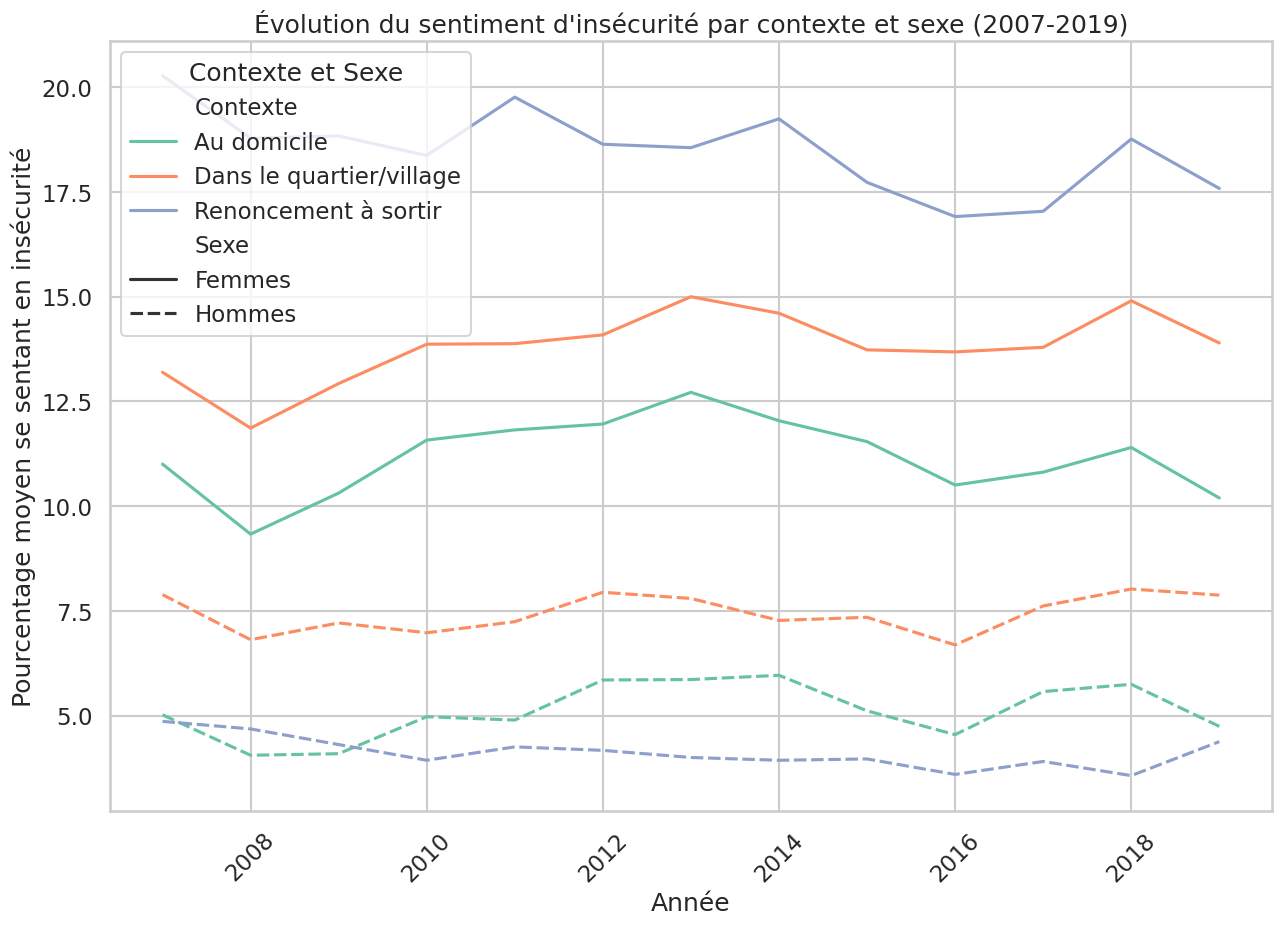

In [21]:
# Filtrage des données pour les graphiques
df_graph = df_total.groupby(['Contexte', 'Sexe', 'Année'])['Pourcentage'].mean().reset_index()

# Création des graphiques
plt.figure(figsize=(15, 10))
sns.lineplot(x='Année', y='Pourcentage', hue='Contexte', style='Sexe', data=df_graph)
plt.title('Évolution du sentiment d\'insécurité par contexte et sexe (2007-2019)')
plt.xlabel('Année')
plt.ylabel('Pourcentage moyen se sentant en insécurité')
plt.legend(title='Contexte et Sexe', loc='upper left')
plt.xticks(rotation=45)
plt.show()


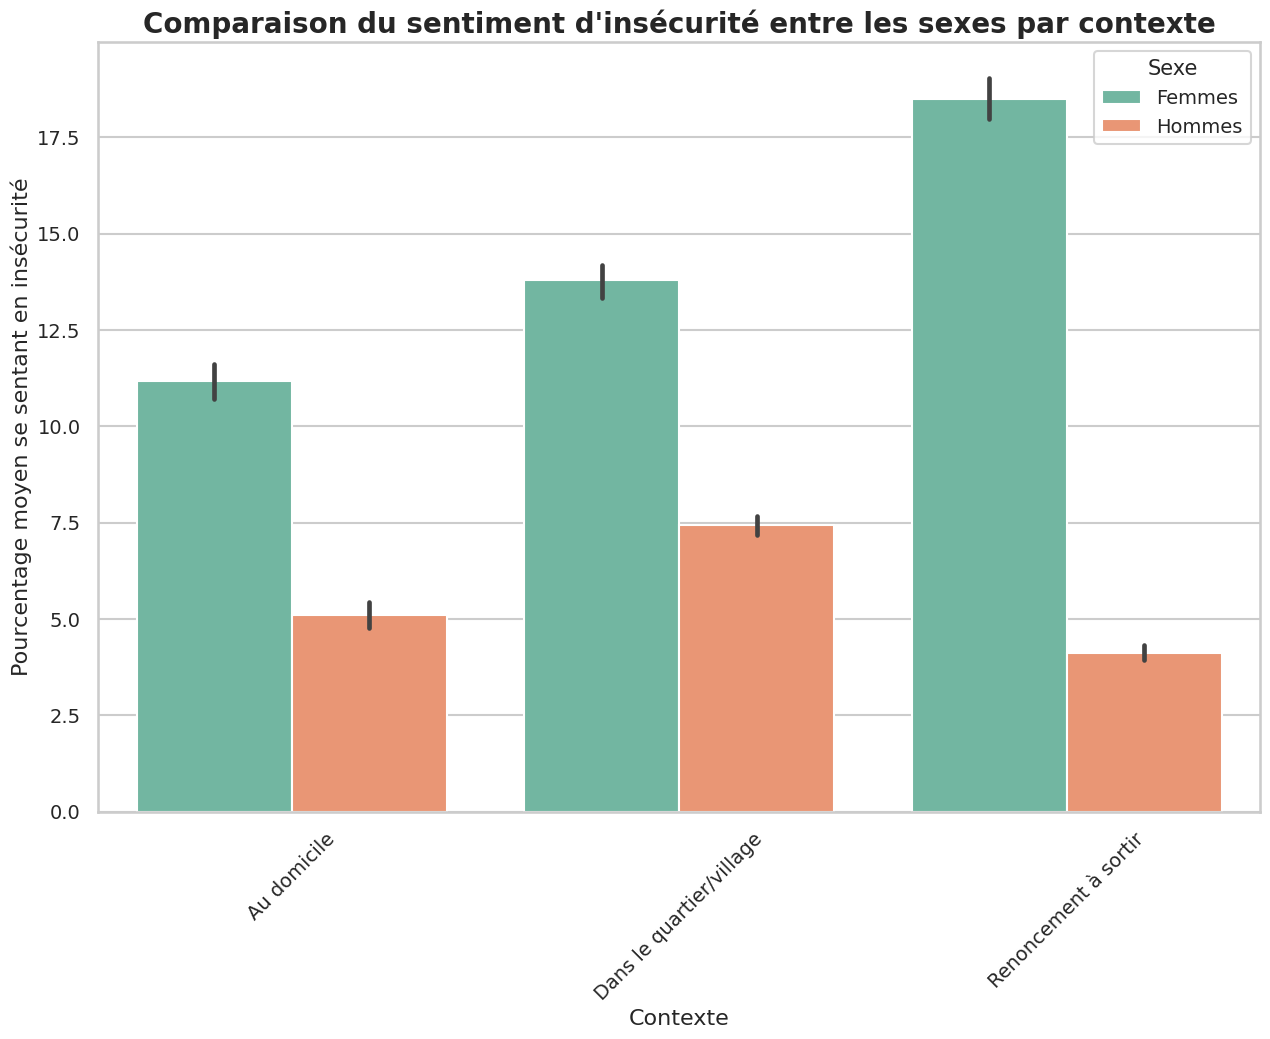

In [25]:
sns.set(style="whitegrid", context="talk")


plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x='Contexte', y='Pourcentage', hue='Sexe', data=df_graph, palette='Set2')


plt.title('Comparaison du sentiment d\'insécurité entre les sexes par contexte', fontsize=20, fontweight='bold')
plt.xlabel('Contexte', fontsize=16)
plt.ylabel('Pourcentage moyen se sentant en insécurité', fontsize=16)

plt.legend(title='Sexe', fontsize=14, title_fontsize='15')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.show()


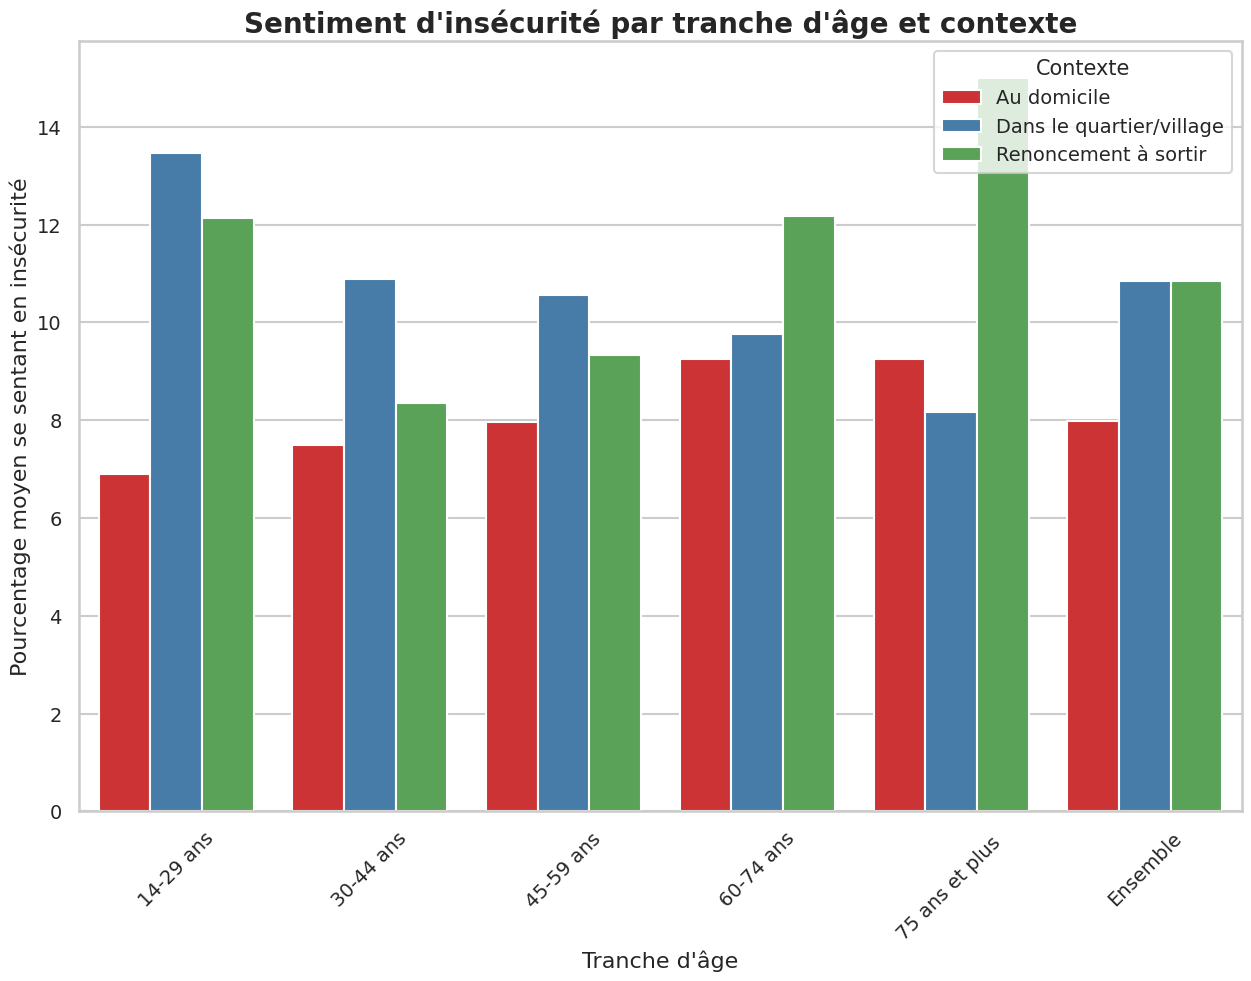

In [29]:
sns.set(style="whitegrid", context="talk", palette="Set1")


plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x='Tranche d\'âge', y='Pourcentage', hue='Contexte', data=df_age)


plt.title('Sentiment d\'insécurité par tranche d\'âge et contexte', fontsize=20, fontweight='bold')
plt.xlabel('Tranche d\'âge', fontsize=16)
plt.ylabel('Pourcentage moyen se sentant en insécurité', fontsize=16)

plt.legend(title='Contexte', fontsize=14, title_fontsize='15', loc='upper right')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.show()
